# 00 settings

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from scipy import signal
import pymannkendall as mk

In [23]:
# path
res_path = 'xxx/data_analysis_res_m010/'
load_path = 'xxx/data_m010/'

res_path = 'F:/THU/anesthesia_light/data_analysis_res_m010/'
load_path = 'F:/THU/anesthesia_light/data_m010/'

print("res_path:", res_path)
print("load_path:", load_path)

# parameters
duration = 10
calc_start, calc_end = 2250, 3750

bs_time_range = [2310, 2340, 2370, 2420, 2453, 2486, 2554, 2596, 2688, 2713, \
             2766, 2916, 3012, 3072, 3130, 3282, 3402, 3581, 3661]
ane_time_range = [2296, 2330, 2358, 2396, 2439, 2475, 2526, 2656, 2746, 2846,\
             2976, 3036, 3096, 3196, 3256, 3316, 3446, 3616, 3716]

bs_ane_time_range = bs_time_range + ane_time_range
bs_ane_time_range.sort()
print("bs_ane_time_range:", len(bs_ane_time_range))

bs_time_idx = []
for i in bs_time_range:
    bs_time_idx.append(bs_ane_time_range.index(i))
print("bs_time_idx:", len(bs_time_idx), bs_time_idx[:5])   

ane_time_idx = []
for i in ane_time_range:
    ane_time_idx.append(bs_ane_time_range.index(i))
print("ane_time_idx:", len(ane_time_idx), ane_time_idx[:5])   

res_path: F:/THU/anesthesia_light/data_analysis_res_m010/
load_path: F:/THU/anesthesia_light/data_m010/
bs_ane_time_range: 38
bs_time_idx: 19 [1, 3, 5, 7, 9]
ane_time_idx: 19 [0, 2, 4, 6, 8]


# 01 load data

denoised_data: (17655, 9676)


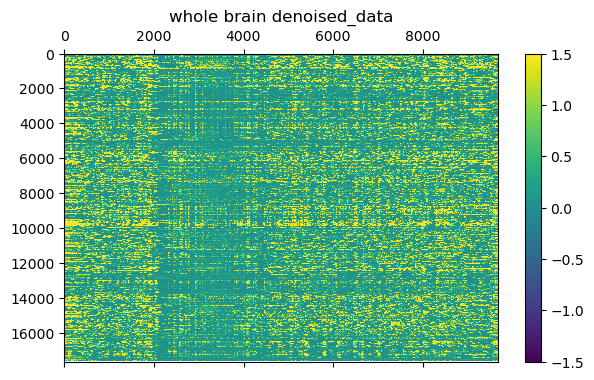

In [24]:
'''
calc data
'''
denoised_data = np.load(res_path + "records/neuron_denoised_records_whole_brain.npy")
print("denoised_data:", denoised_data.shape)

fig,ax = plt.subplots(figsize=(7,4), dpi=100,facecolor="w")
caxes = ax.matshow(denoised_data, vmin = -1.5, vmax = 1.5, cmap = "viridis", aspect = "auto")
fig.colorbar(caxes)
plt.title("whole brain denoised_data")
plt.show()

In [25]:
valid_neuron_x = pd.read_csv(load_path + "ele_calc/valid_neuron_x.csv")
print("valid_neuron_x:", type(valid_neuron_x), valid_neuron_x.shape)
valid_neuron_x = valid_neuron_x.values

valid_neuron_y = pd.read_csv(load_path + "ele_calc/valid_neuron_y.csv")
print("valid_neuron_y:", type(valid_neuron_y), valid_neuron_y.shape)
valid_neuron_y = valid_neuron_y.values


valid_neuron_x: <class 'pandas.core.frame.DataFrame'> (17655, 1)
valid_neuron_y: <class 'pandas.core.frame.DataFrame'> (17655, 1)


# 02 burst neurons

select_data_ids: 13135 <class 'numpy.ndarray'>


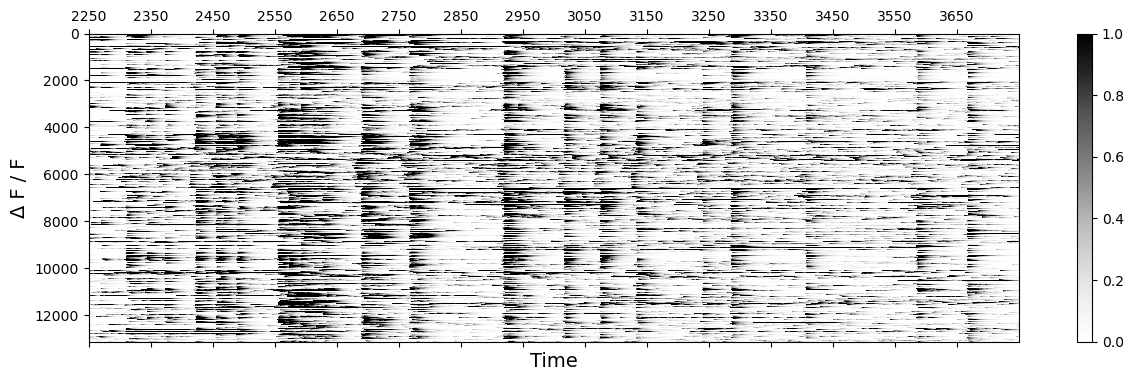

code_list: 13135
sort_id: 13135
sort_id: 13096
select_data_ids_sort: 13096
calc_rec: (13096, 1500)


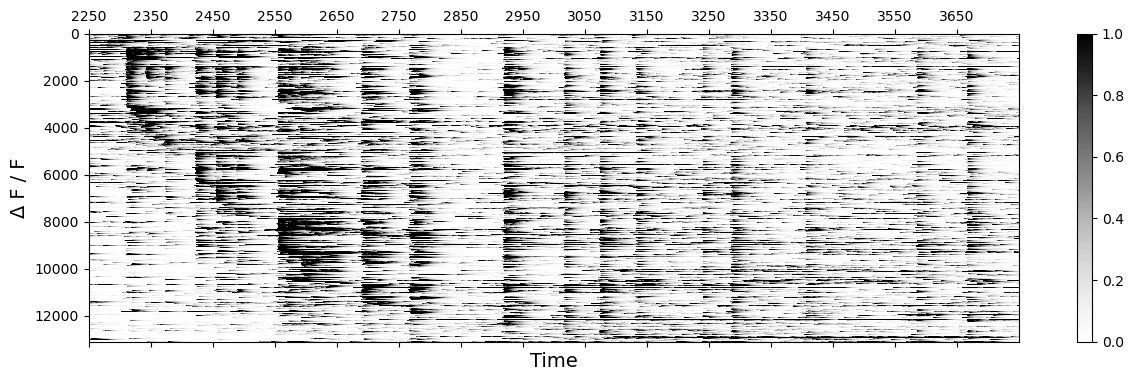

13096 38


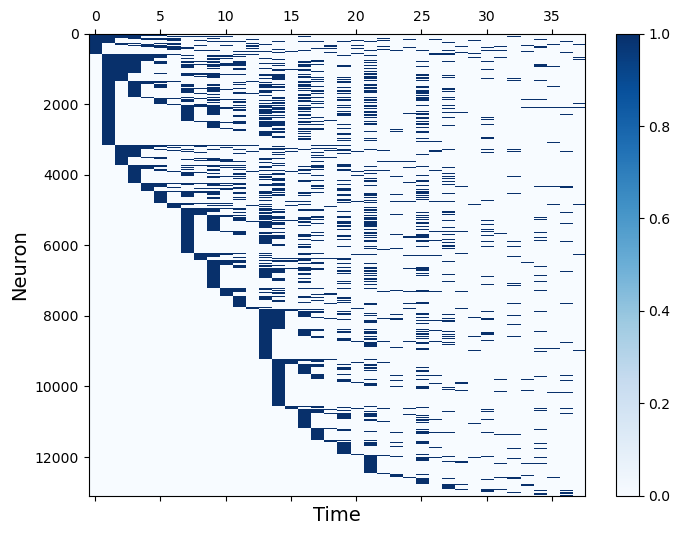

In [26]:
'''
burst neurons
'''
name = "burst"
select_data_ids = np.load(res_path + "neurons/neurons_ids_" + name + "_all_start_set_selfAvg_relax.npy")
print("select_data_ids:", len(select_data_ids), type(select_data_ids))

calc_rec = denoised_data[select_data_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()


'''
sort burst neurons
'''
select_data_ids_dict = {}
for start in bs_ane_time_range:   
    if start in bs_time_range:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_burst_start" + str(start) + "_duration" + str(duration) + "_selfAvg_relax.npy")
    else:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_supp_start" + str(start) + "_duration" + str(duration) + "_selfAvg_relax.npy")
code_list = []
count_0 = 0
for neuron_i in select_data_ids:
    code = []
    for start in bs_ane_time_range:
        if neuron_i in select_data_ids_dict[start]:
            code.append(1)
        else:
            code.append(0)
    code_int = ''.join(str(i) for i in code)
    code_list.append(int(code_int))
    if int(code_int) == 0:
        count_0 += 1
print("code_list:", len(code_list))
sort_id = sorted(range(len(code_list)), key = lambda k: code_list[k], reverse = True)
print("sort_id:", len(sort_id))
sort_id = sort_id[0 : len(sort_id) - count_0]
print("sort_id:", len(sort_id))

select_data_ids_sort = [select_data_ids[i] for i in sort_id]
print("select_data_ids_sort:", len(select_data_ids_sort))

calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
print("calc_rec:", calc_rec.shape)

fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()
    
'''
burst code
'''

num = len(bs_ane_time_range)
code_matrix = np.zeros((len(sort_id), num))
for i in range(len(sort_id)):
    code = code_list[sort_id[i]]
    code_int_list = [int(j) for j in list(str(code))]
        
    for k in range(len(code_int_list)):
        int_idx = len(code_int_list) - k - 1
        matrix_idx = num - k - 1
        code_matrix[i,matrix_idx] = code_int_list[int_idx]
print(len(code_matrix), len(code_matrix[0]))

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix, vmin = 0, vmax = 1, cmap = "Blues", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()


only_bs_ids: 7432
bs_and_ane_ids: 5596
------------------ only-type neurons ----------------------


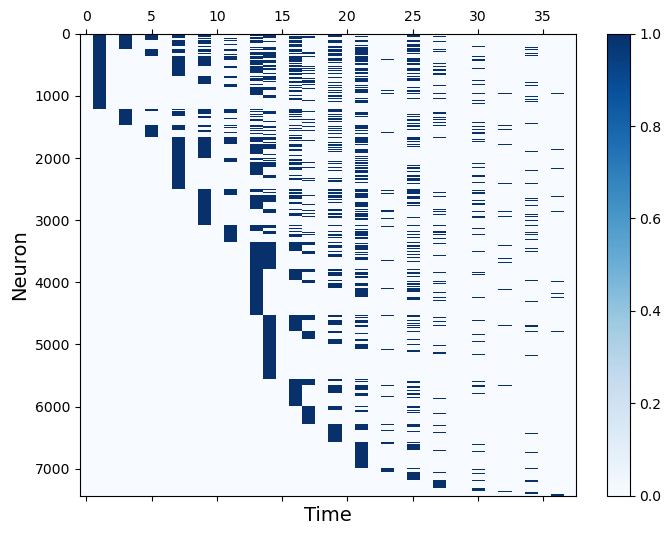

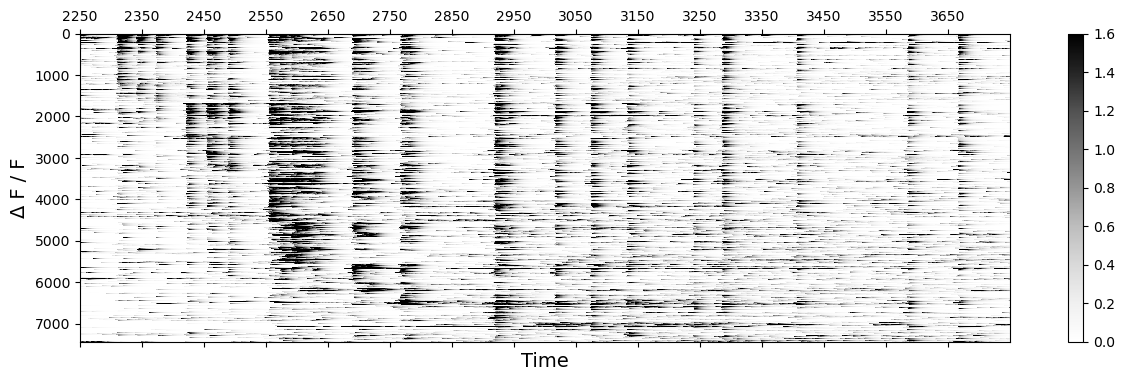

------------------ both-type neurons ----------------------


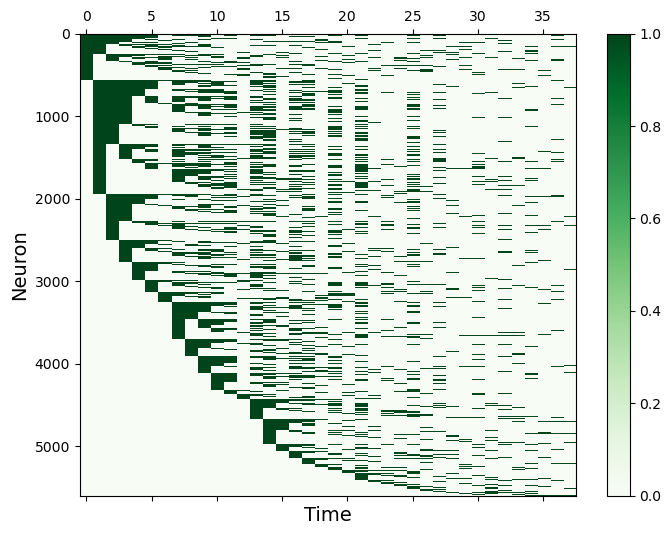

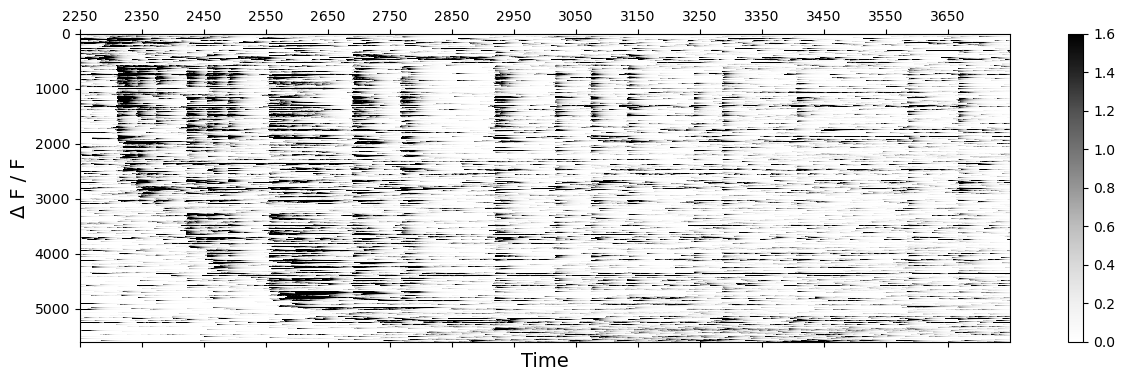

end


In [28]:
'''
detailed category
'''

name = "burst"

only_bs_ids = []
bs_and_ane_ids = []
for i in range(len(code_matrix)):
    active_idx = list(np.where(code_matrix[i] == 1)[0])
    ane_active_idx = list(set(active_idx) & set(ane_time_idx))
    bs_active_idx = list(set(active_idx) & set(bs_time_idx))
    if len(bs_active_idx) == 0:
        continue
    if len(ane_active_idx) == 0:
        only_bs_ids.append(i)
    else:
        bs_and_ane_ids.append(i)
print("only_bs_ids:", len(only_bs_ids)) 
print("bs_and_ane_ids:", len(bs_and_ane_ids)) 

## only burst
print("------------------ only-type neurons ----------------------")
code_matrix_only_bs = code_matrix[only_bs_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_only_bs, vmin = 0, vmax = 1, cmap = "Blues", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

data_only_bs_ids = [select_data_ids_sort[i] for i in only_bs_ids]
calc_rec_only_bs = denoised_data[data_only_bs_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_only_bs, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_only_" + name + "_ids.npy", data_only_bs_ids)


## both burst and supp
print("------------------ both-type neurons ----------------------")
code_matrix_bs_ane = code_matrix[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_bs_ane, vmin = 0, vmax = 1, cmap = "Greens", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

bs_ane_ids = [select_data_ids_sort[i] for i in bs_and_ane_ids]
calc_rec_bs_ane = denoised_data[bs_ane_ids, calc_start : calc_end]
# calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
# calc_rec_bs_ane = calc_rec[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_bs_ane, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_both_burst_supp_ids.npy", bs_ane_ids)

print("end")


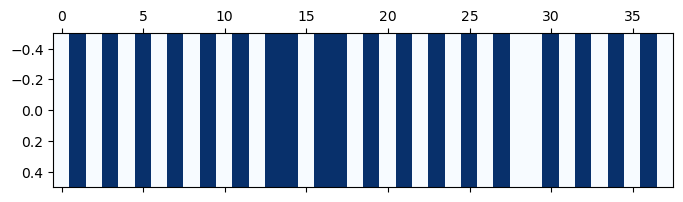

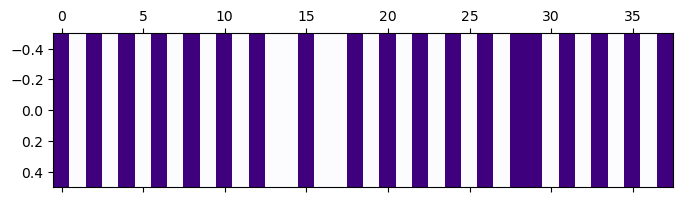

============= B neurons transfer =================
recall_matrix_bs: (19, 38)


D:\Program_Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Program_Files\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


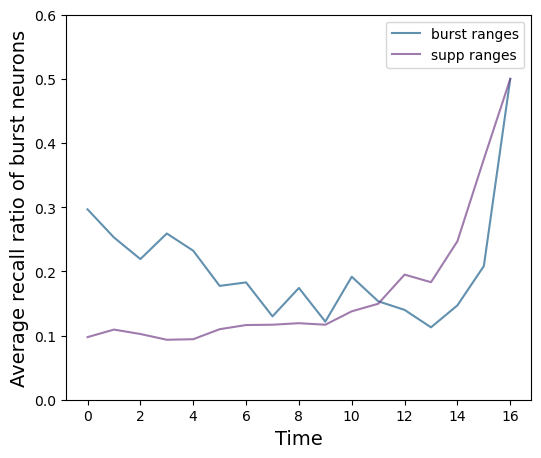

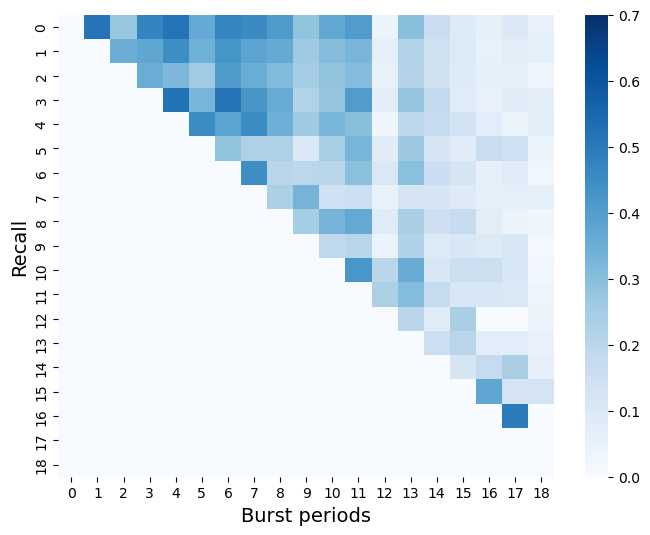

D:\Program_Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Program_Files\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


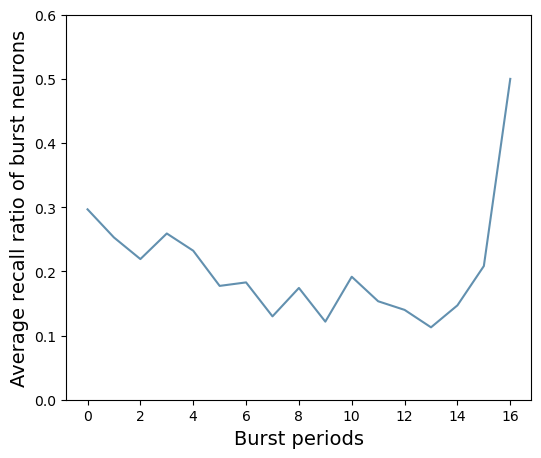

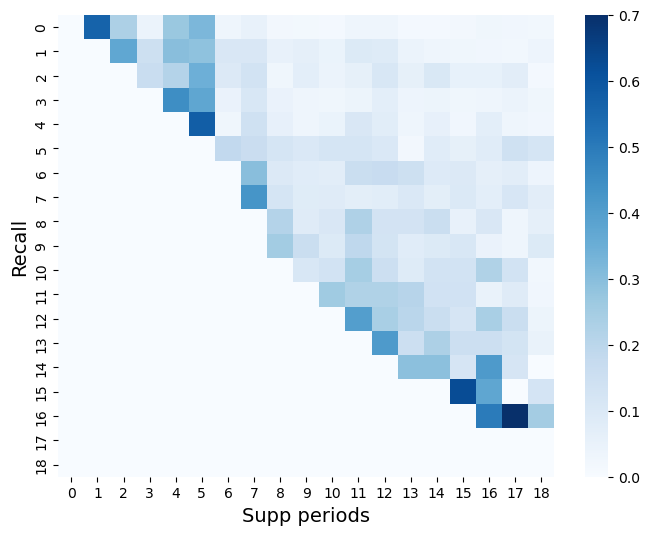

D:\Program_Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Program_Files\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


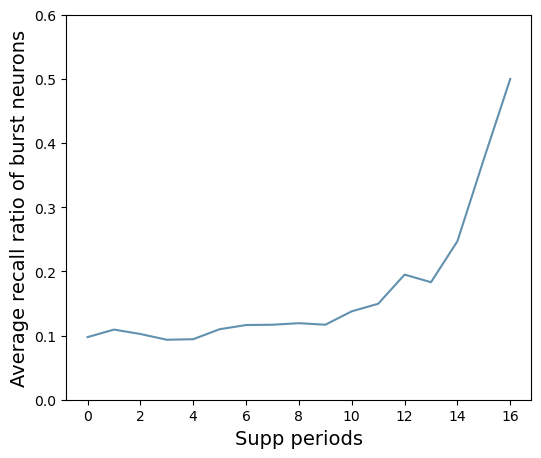

============= S neurons transfer =================
recall_matrix_ane: (19, 38)


D:\Program_Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Program_Files\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


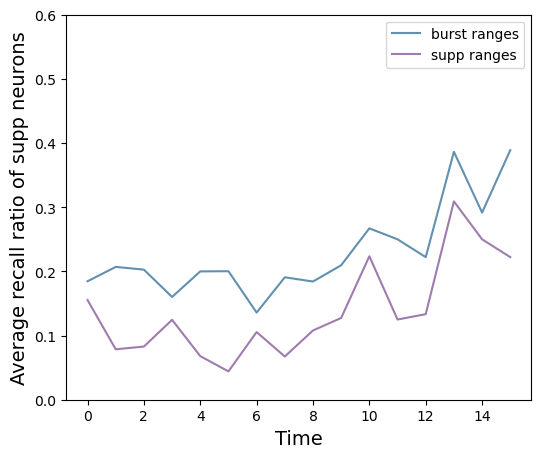

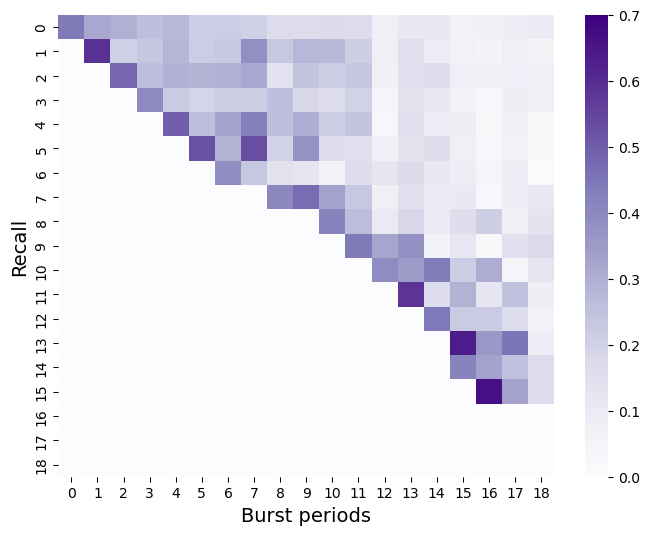

D:\Program_Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Program_Files\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


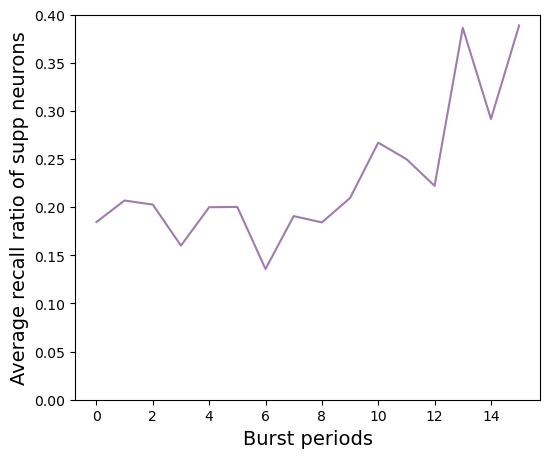

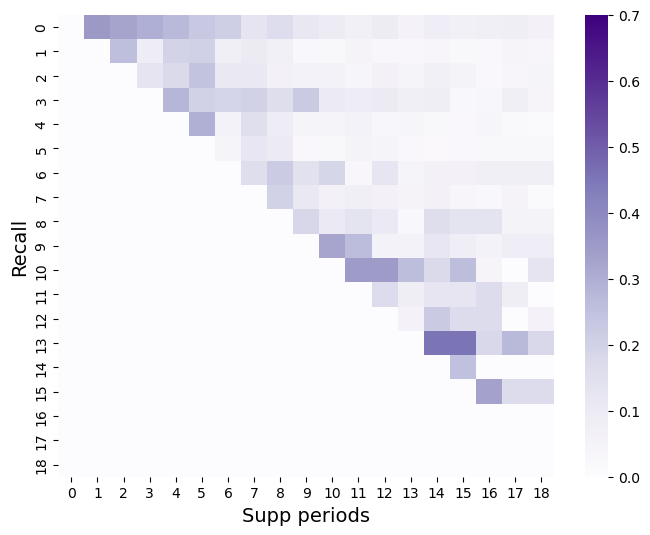

D:\Program_Files\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Program_Files\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


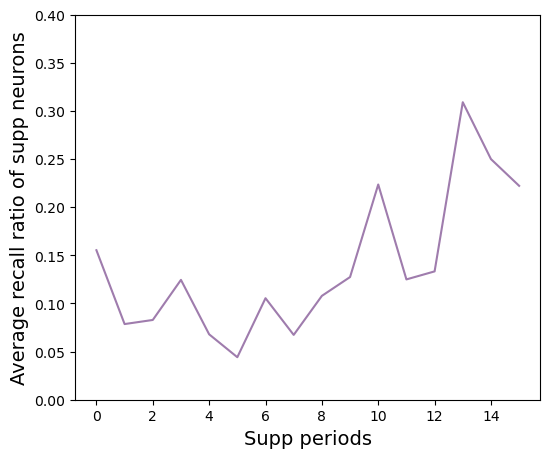

In [29]:
'''
B-S transfer
'''

recall_matrix = np.zeros((len(code_matrix_bs_ane[0]), len(code_matrix_bs_ane[0])))

start_row = 0
for col in range(len(code_matrix_bs_ane[0])):
    code_range = code_matrix_bs_ane[:, col]
    exist_ids = [i for i in range(len(code_range)) if code_range[i] == 1]
    new_ids = [i for i in exist_ids if i > start_row]
    if len(new_ids) == 0:
        break
    start_row = max(new_ids)
    
    new_ids_cnt = len(new_ids)
    new_code_matrix = code_matrix_bs_ane[new_ids]
    for new_col in range(col + 1, len(code_matrix_bs_ane[0])):
        recal = sum(new_code_matrix[:, new_col]) / new_ids_cnt
        recall_matrix[col, new_col] = recal
        
# time ranges     
range_color = [1 if i in bs_time_idx else 0 for i in range(len(code_matrix_bs_ane[0]))]
range_color = np.array(range_color).reshape(1,len(range_color))
fig,ax = plt.subplots(figsize=(8,2), dpi=100, facecolor="w")
caxes = ax.matshow(range_color, cmap = "Blues", aspect = "auto") #BuPu
plt.savefig(res_path + "neurons/" + name + "_neurons_bs_time.pdf", bbox_inches='tight')
plt.show()

range_color = [1 if i in ane_time_idx else 0 for i in range(len(code_matrix_bs_ane[0]))]
range_color = np.array(range_color).reshape(1,len(range_color))
fig,ax = plt.subplots(figsize=(8,2), dpi=100, facecolor="w")
caxes = ax.matshow(range_color, cmap = "Purples", aspect = "auto") #BuPu
plt.savefig(res_path + "neurons/" + name + "_neurons_ane_time.pdf", bbox_inches='tight')
plt.show()

print("============= B neurons transfer =================")
name = "burst"

recall_matrix_bs = []
for i in bs_time_idx:
    recall_matrix_bs.append(recall_matrix[i])
recall_matrix_bs = np.array(recall_matrix_bs)
print("recall_matrix_bs:", recall_matrix_bs.shape)

bs_recal_avg = []
ane_recal_avg = []
for i in range(len(recall_matrix_bs)):
    trace = recall_matrix_bs[i]
    trace_bs = [trace[j] for j in bs_time_idx if trace[j] != 0]
    trace_ane = [trace[j] for j in ane_time_idx if trace[j] != 0]
    bs_recal_avg.append(np.mean(trace_bs))
    ane_recal_avg.append(np.mean(trace_ane))
fig,ax = plt.subplots(figsize=(6,5), dpi=100, facecolor="w")
plt.plot(bs_recal_avg, color = "#1F618D", alpha = 0.7, label = "burst ranges")
plt.plot(ane_recal_avg, color = "#76448A", alpha = 0.7, label = "supp ranges")
plt.ylabel("Average recall ratio of burst neurons", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.legend()
plt.ylim(0,0.6)
plt.savefig(res_path + "neurons/" + name + "_neurons_recal_ratio_avg_b-to-b-s.pdf", bbox_inches='tight')
plt.show()

## split reansfer-b-neurons
recall_matrix_to_b = []
for i in bs_time_idx:
    recall_matrix_to_b.append(recall_matrix_bs[:,i])
recall_matrix_to_b = np.array(recall_matrix_to_b).T
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_to_b, cmap = "Blues", vmin = 0, vmax = 0.7)
plt.ylabel("Recall", fontsize = 14)
plt.xlabel("Burst periods", fontsize = 14)
plt.savefig(res_path + "neurons/" + name + "_neurons_recal_ratio_matrix_b-to-b.pdf", bbox_inches='tight')
plt.show()

bs_recal_avg = []
for i in range(len(recall_matrix_to_b)):
    trace = recall_matrix_to_b[i]
    trace_bs = [trace[j] for j in range(len(trace)) if trace[j] != 0]
    bs_recal_avg.append(np.mean(trace_bs))
fig,ax = plt.subplots(figsize=(6,5), dpi=100, facecolor="w")
plt.plot(bs_recal_avg, color = "#1F618D", alpha = 0.7, label = "burst ranges")
plt.ylabel("Average recall ratio of burst neurons", fontsize = 14)
plt.xlabel("Burst periods", fontsize = 14)
# plt.legend()
plt.ylim(0,0.6)
plt.savefig(res_path + "neurons/" + name + "_neurons_recal_ratio_avg_b-to-b.pdf", bbox_inches='tight')
plt.show()


## split transfer-s-neurons
recall_matrix_to_s = []
for i in ane_time_idx:
    recall_matrix_to_s.append(recall_matrix_bs[:,i])
recall_matrix_to_s = np.array(recall_matrix_to_s).T
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_to_s, cmap = "Blues",vmin = 0, vmax = 0.7)
plt.ylabel("Recall", fontsize = 14)
plt.xlabel("Supp periods", fontsize = 14)
plt.savefig(res_path + "neurons/" + name + "_neurons_recal_ratio_matrix_b-to-s.pdf", bbox_inches='tight')
plt.show()

ane_recal_avg = []
for i in range(len(recall_matrix_to_s)):
    trace = recall_matrix_to_s[i]
    trace_bs = [trace[j] for j in range(len(trace)) if trace[j] != 0]
    ane_recal_avg.append(np.mean(trace_bs))
fig,ax = plt.subplots(figsize=(6,5), dpi=100, facecolor="w")
plt.plot(ane_recal_avg, color = "#1F618D", alpha = 0.7, label = "burst ranges")
plt.ylabel("Average recall ratio of burst neurons", fontsize = 14)
plt.xlabel("Supp periods", fontsize = 14)
# plt.legend()
plt.ylim(0,0.6)
plt.savefig(res_path + "neurons/" + name + "_neurons_recal_ratio_avg_b-to-s.pdf", bbox_inches='tight')
plt.show()


print("============= S neurons transfer =================")
name = "supp"

recall_matrix_ane = []
for i in ane_time_idx:
    recall_matrix_ane.append(recall_matrix[i])
recall_matrix_ane = np.array(recall_matrix_ane)
print("recall_matrix_ane:", recall_matrix_ane.shape)


bs_recal_avg = []
ane_recal_avg = []
for i in range(len(recall_matrix_ane)):
    trace = recall_matrix_ane[i]
    trace_bs = [trace[j] for j in bs_time_idx if trace[j] != 0]
    trace_ane = [trace[j] for j in ane_time_idx if trace[j] != 0]
    bs_recal_avg.append(np.mean(trace_bs))
    ane_recal_avg.append(np.mean(trace_ane))
fig,ax = plt.subplots(figsize=(6,5), dpi=100, facecolor="w")
plt.plot(bs_recal_avg, color = "#1F618D", alpha = 0.7, label = "burst ranges")
plt.plot(ane_recal_avg, color = "#76448A", alpha = 0.7, label = "supp ranges")
plt.ylabel("Average recall ratio of supp neurons", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.legend()
plt.ylim(0,0.6)
plt.savefig(res_path + "neurons/" + name + "_neurons_recal_ratio_avg_s-to-b-s.pdf", bbox_inches='tight')
plt.show()


## split reansfer-b-neurons
recall_matrix_to_b = []
for i in bs_time_idx:
    recall_matrix_to_b.append(recall_matrix_ane[:,i])
recall_matrix_to_b = np.array(recall_matrix_to_b).T
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_to_b, cmap = "Purples", vmin = 0, vmax = 0.7)
plt.ylabel("Recall", fontsize = 14)
plt.xlabel("Burst periods", fontsize = 14)
plt.savefig(res_path + "neurons/" + name + "_neurons_recal_ratio_matrix_s-to-b.pdf", bbox_inches='tight')
plt.show()

bs_recal_avg = []
for i in range(len(recall_matrix_to_b)):
    trace = recall_matrix_to_b[i]
    trace_bs = [trace[j] for j in range(len(trace)) if trace[j] != 0]
    bs_recal_avg.append(np.mean(trace_bs))
fig,ax = plt.subplots(figsize=(6,5), dpi=100, facecolor="w")
plt.plot(bs_recal_avg, color = "#76448A", alpha = 0.7, label = "burst ranges")
plt.ylabel("Average recall ratio of supp neurons", fontsize = 14)
plt.xlabel("Burst periods", fontsize = 14)
# plt.legend()
plt.ylim(0,0.4)
plt.savefig(res_path + "neurons/" + name + "_neurons_recal_ratio_avg_s-to-b.pdf", bbox_inches='tight')
plt.show()


## split transfer-s-neurons
recall_matrix_to_s = []
for i in ane_time_idx:
    recall_matrix_to_s.append(recall_matrix_ane[:,i])
recall_matrix_to_s = np.array(recall_matrix_to_s).T
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_to_s, cmap = "Purples",vmin = 0, vmax = 0.7)
plt.ylabel("Recall", fontsize = 14)
plt.xlabel("Supp periods", fontsize = 14)
plt.savefig(res_path + "neurons/" + name + "_neurons_recal_ratio_matrix_s-to-s.pdf", bbox_inches='tight')
plt.show()

ane_recal_avg = []
for i in range(len(recall_matrix_to_s)):
    trace = recall_matrix_to_s[i]
    trace_bs = [trace[j] for j in range(len(trace)) if trace[j] != 0]
    ane_recal_avg.append(np.mean(trace_bs))
fig,ax = plt.subplots(figsize=(6,5), dpi=100, facecolor="w")
plt.plot(ane_recal_avg, color = "#76448A", alpha = 0.7, label = "burst ranges")
plt.ylabel("Average recall ratio of supp neurons", fontsize = 14)
plt.xlabel("Supp periods", fontsize = 14)
# plt.legend()
plt.ylim(0,0.4)
plt.savefig(res_path + "neurons/" + name + "_neurons_recal_ratio_avg_s-to-s.pdf", bbox_inches='tight')
plt.show()


============= B neurons =================


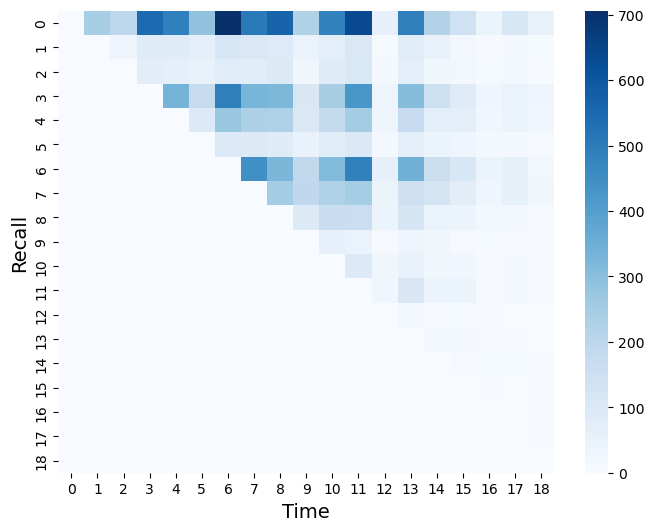

only_b_recruit_num: 19
only_b_recall_num: 19


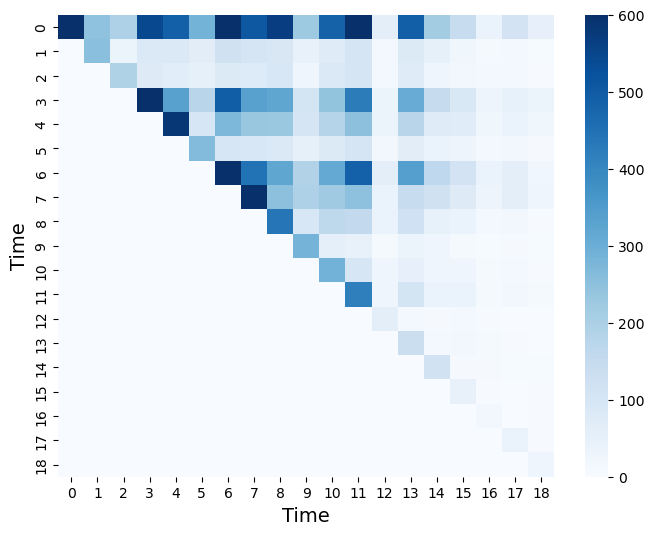

only_b_recruit_ratio: 19
only_b_recall_ratio: 19


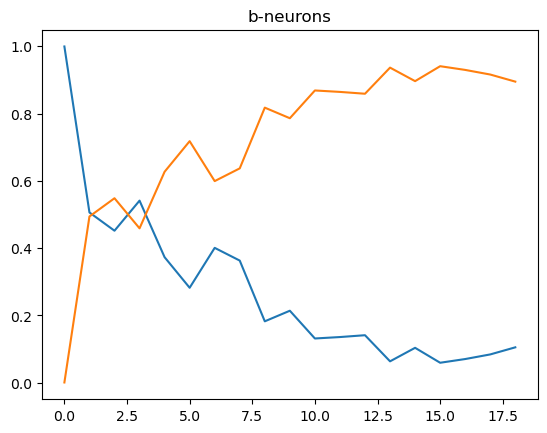

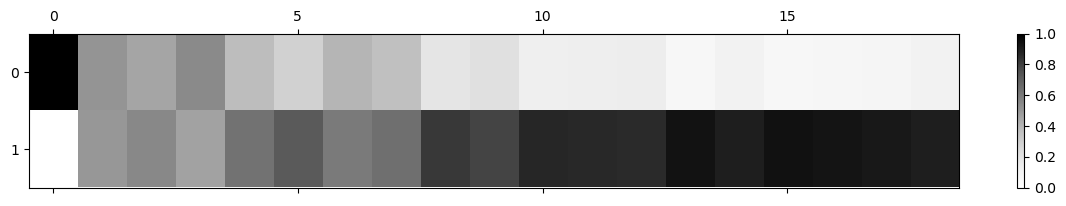

============= Both neurons =================
both_recruit_b_num: 19
both_recall_b_num: 19
both_recruit_s_num: 19
both_recall_s_num: 19
--------- [burst periods]


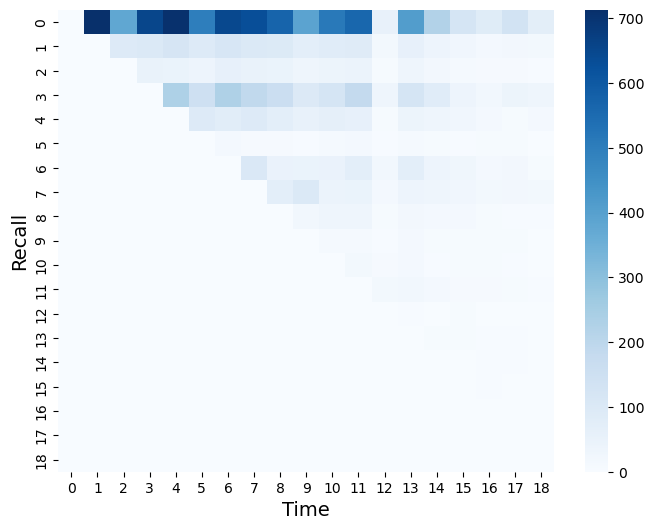

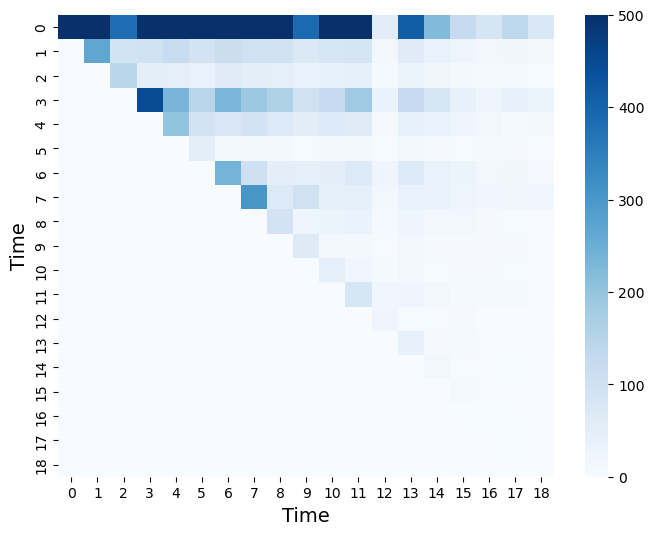

both_b_recruit_ratio: 19
both_b_recall_ratio: 19


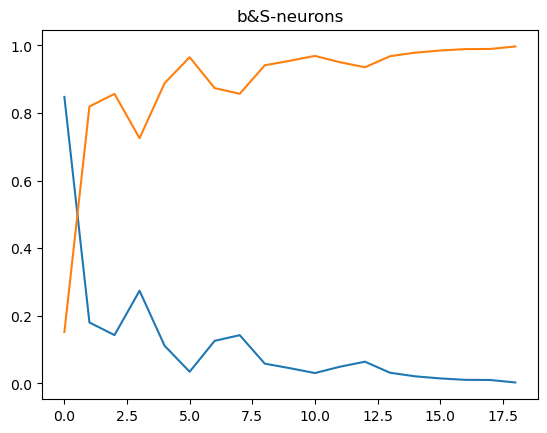

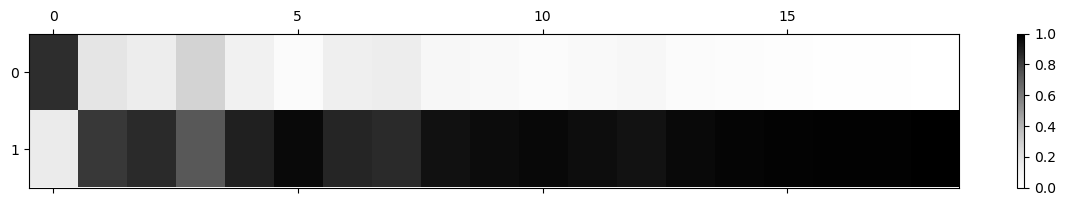

--------- [supp periods]


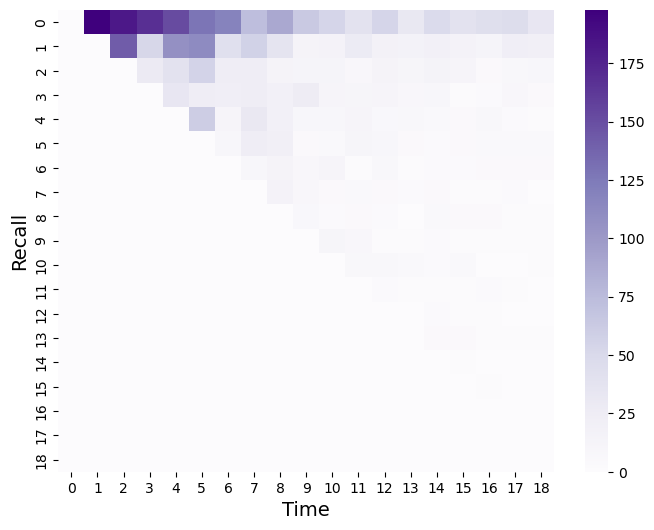

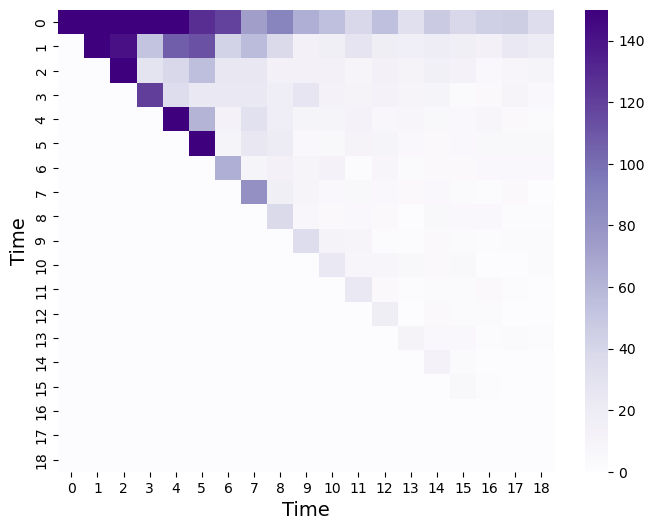

both_s_recruit_ratio: 19
both_s_recall_ratio: 19


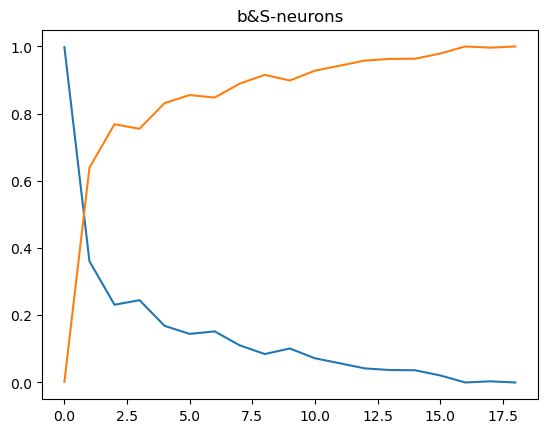

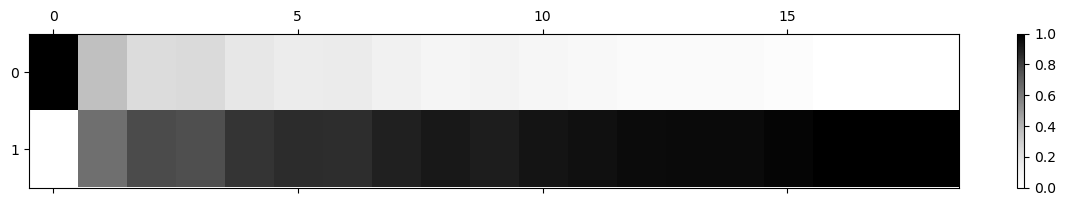

In [30]:
'''
recruit and recall
'''

name = "burst"

print("============= B neurons =================")

recall_matrix = np.zeros((len(code_matrix_only_bs[0]), len(code_matrix_only_bs[0])))
start_row = 0
for col in range(len(code_matrix_only_bs[0])):
    code_range = code_matrix_only_bs[:, col]
    exist_ids = [i for i in range(len(code_range)) if code_range[i] == 1]
    new_ids = [i for i in exist_ids if i > start_row]
    start_row = max(new_ids) if len(new_ids) != 0 else start_row
    
    new_ids_cnt = len(new_ids)
    new_code_matrix = code_matrix_only_bs[new_ids]
    for new_col in range(col + 1, len(code_matrix_bs_ane[0])):
        recal = sum(new_code_matrix[:, new_col]) if new_ids_cnt != 0 else 0
        recall_matrix[col, new_col] = recal

# recall matrix
recall_matrix_bs = []
for i in bs_time_idx:
    recall_matrix_bs.append(recall_matrix[i])
recall_matrix_bs = np.array(recall_matrix_bs)
recall_matrix_bs_only = []
for i in bs_time_idx:
    recall_matrix_bs_only.append(recall_matrix_bs[:, i])
recall_matrix_bs_only = np.array(recall_matrix_bs_only).T

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_bs_only, cmap = "Blues")
plt.ylabel("Recall", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()

# recruit and recall number 
only_b_recruit_num = []
only_b_recall_num = []
start_row = 0
for col in bs_time_idx:
    code_range = code_matrix_only_bs[:, col]
    exist_ids = [i for i in range(len(code_range)) if code_range[i] == 1]
    new_ids = [i for i in exist_ids if i > start_row]
    start_row = max(new_ids) if len(new_ids) != 0 else start_row
    only_b_recruit_num.append(len(new_ids))
    only_b_recall_num.append(len(exist_ids) - len(new_ids))      

np.save(res_path + "neurons/neurons_new_recruit_num_only_bs.npy", only_b_recruit_num)
print("only_b_recruit_num:", len(only_b_recruit_num))
np.save(res_path + "neurons/neurons_recall_num_only_bs.npy", only_b_recall_num)
print("only_b_recall_num:", len(only_b_recall_num))

# recruit and recall matrix
for i in range(len(only_b_recruit_num)):
    recall_matrix_bs_only[i,i] = only_b_recruit_num[i]

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_bs_only, cmap = "Blues", vmin = 0, vmax = 600)
plt.ylabel("Time", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/neurons_recruit_vs_recall_matrix_only_bs.pdf", bbox_inches='tight')
plt.show()

# recruit and recall ratio
n_data_only_bs = [only_b_recruit_num[i] + only_b_recall_num[i] for i in range(len(only_b_recruit_num))]
only_b_recruit_ratio = [only_b_recruit_num[i] / n_data_only_bs[i] for i in range(len(only_b_recruit_num))]
print("only_b_recruit_ratio:", len(only_b_recruit_ratio))
only_b_recall_ratio = [only_b_recall_num[i] / n_data_only_bs[i] for i in range(len(only_b_recruit_num))]
print("only_b_recall_ratio:", len(only_b_recall_ratio))

plt.plot(only_b_recruit_ratio)
plt.plot(only_b_recall_ratio)
plt.title("b-neurons")
plt.show()

plot_matrix = np.array([only_b_recruit_ratio, only_b_recall_ratio])
fig,ax = plt.subplots(figsize=(15,2), dpi=100, facecolor="w")
caxes = ax.matshow(plot_matrix, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.savefig(res_path + "neurons/neurons_recruit_vs_recall_ratio_only_bs.pdf", bbox_inches='tight')
plt.show()



print("============= Both neurons =================")

recall_matrix = np.zeros((len(code_matrix_bs_ane[0]), len(code_matrix_bs_ane[0])))
start_row = 0
for col in range(len(code_matrix_bs_ane[0])):
    code_range = code_matrix_bs_ane[:, col]
    exist_ids = [i for i in range(len(code_range)) if code_range[i] == 1]
    new_ids = [i for i in exist_ids if i > start_row]
    start_row = max(new_ids) if len(new_ids) != 0 else start_row
    
    new_ids_cnt = len(new_ids)
    new_code_matrix = code_matrix_bs_ane[new_ids]
    for new_col in range(col + 1, len(code_matrix_bs_ane[0])):
        recal = sum(new_code_matrix[:, new_col]) if new_ids_cnt != 0 else 0
        recall_matrix[col, new_col] = recal
        
# recruit and recall number 
both_recruit_num = []
both_recall_num = []
start_row = 0
for col in range(len(code_matrix_bs_ane[0])):
    code_range = code_matrix_bs_ane[:, col]
    exist_ids = [i for i in range(len(code_range)) if code_range[i] == 1]
    new_ids = [i for i in exist_ids if i > start_row]
    start_row = max(new_ids) if len(new_ids) != 0 else start_row
    both_recruit_num.append(len(new_ids))
    both_recall_num.append(len(exist_ids) - len(new_ids))     

both_recruit_b_num = [both_recruit_num[i] for i in bs_time_idx]
np.save(res_path + "neurons/neurons_new_recruit_num_both_in_bs.npy", both_recruit_b_num)
print("both_recruit_b_num:", len(both_recruit_b_num))
both_recall_b_num = [both_recall_num[i] for i in bs_time_idx]
np.save(res_path + "neurons/neurons_recall_num_both_in_bs.npy", both_recall_b_num)
print("both_recall_b_num:", len(both_recall_b_num))

both_recruit_s_num = [both_recruit_num[i] for i in ane_time_idx]
np.save(res_path + "neurons/neurons_new_recruit_num_both_in_ane.npy", both_recruit_s_num)
print("both_recruit_s_num:", len(both_recruit_s_num))
both_recall_s_num = [both_recall_num[i] for i in ane_time_idx]
np.save(res_path + "neurons/neurons_recall_num_both_in_ane.npy", both_recall_s_num)
print("both_recall_s_num:", len(both_recall_s_num))

        
print("--------- [burst periods]")

# recall matrix
recall_matrix_bs = []
for i in bs_time_idx:
    recall_matrix_bs.append(recall_matrix[i])
recall_matrix_bs = np.array(recall_matrix_bs)
recall_matrix_bs_both = []
for i in bs_time_idx:
    recall_matrix_bs_both.append(recall_matrix_bs[:, i])
recall_matrix_bs_both = np.array(recall_matrix_bs_both).T

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_bs_both, cmap = "Blues")
plt.ylabel("Recall", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()

# recruit and recall matrix
for i in range(len(both_recruit_b_num)):
    recall_matrix_bs_both[i,i] = both_recruit_b_num[i]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_bs_both, cmap = "Blues", vmin = 0, vmax = 500)
plt.ylabel("Time", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/neurons_recruit_vs_recall_matrix_both_bs.pdf", bbox_inches='tight')
plt.show()

# recruit and recall ratio
n_data_both_bs = [both_recruit_b_num[i] + both_recall_b_num[i] for i in range(len(both_recruit_b_num))]
both_b_recruit_ratio = [both_recruit_b_num[i] / n_data_both_bs[i] for i in range(len(both_recruit_b_num))]
print("both_b_recruit_ratio:", len(both_b_recruit_ratio))
both_b_recall_ratio = [both_recall_b_num[i] / n_data_both_bs[i] for i in range(len(both_recruit_b_num))]
print("both_b_recall_ratio:", len(both_b_recall_ratio))

plt.plot(both_b_recruit_ratio)
plt.plot(both_b_recall_ratio)
plt.title("b&S-neurons")
plt.show()

plot_matrix = np.array([both_b_recruit_ratio, both_b_recall_ratio])
fig,ax = plt.subplots(figsize=(15,2), dpi=100, facecolor="w")
caxes = ax.matshow(plot_matrix, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.savefig(res_path + "neurons/neurons_recruit_vs_recall_ratio_both_bs.pdf", bbox_inches='tight')
plt.show()


print("--------- [supp periods]")

# recall matrix
recall_matrix_bs = []
for i in ane_time_idx:
    recall_matrix_bs.append(recall_matrix[i])
recall_matrix_bs = np.array(recall_matrix_bs)
recall_matrix_bs_both = []
for i in ane_time_idx:
    recall_matrix_bs_both.append(recall_matrix_bs[:, i])
recall_matrix_bs_both = np.array(recall_matrix_bs_both).T

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_bs_both, cmap = "Purples")
plt.ylabel("Recall", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()

# recruit and recall matrix
for i in range(len(both_recruit_s_num)):
    recall_matrix_bs_both[i,i] = both_recruit_s_num[i]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_bs_both, cmap = "Purples", vmin = 0, vmax = 150)
plt.ylabel("Time", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/neurons_recruit_vs_recall_matrix_both_ane.pdf", bbox_inches='tight')
plt.show()

# recruit and recall ratio
n_data_both_bs = [both_recruit_s_num[i] + both_recall_s_num[i] for i in range(len(both_recruit_s_num))]
both_s_recruit_ratio = [both_recruit_s_num[i] / n_data_both_bs[i] for i in range(len(both_recruit_s_num))]
print("both_s_recruit_ratio:", len(both_s_recruit_ratio))
both_s_recall_ratio = [both_recall_s_num[i] / n_data_both_bs[i] for i in range(len(both_recruit_s_num))]
print("both_s_recall_ratio:", len(both_s_recall_ratio))

plt.plot(both_s_recruit_ratio)
plt.plot(both_s_recall_ratio)
plt.title("b&S-neurons")
plt.show()

plot_matrix = np.array([both_s_recruit_ratio, both_s_recall_ratio])
fig,ax = plt.subplots(figsize=(15,2), dpi=100, facecolor="w")
caxes = ax.matshow(plot_matrix, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.savefig(res_path + "neurons/neurons_recruit_vs_recall_ratio_both_ane.pdf", bbox_inches='tight')
plt.show()


# 03 supp neurons

select_data_ids: 7641 <class 'numpy.ndarray'>


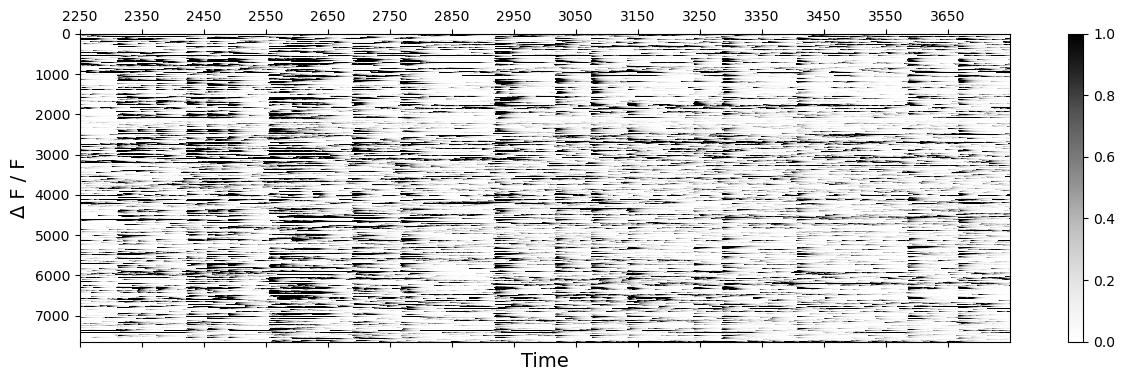

code_list: 7641
sort_id: 7641
sort_id: 7596
select_data_ids_sort: 7596
calc_rec: (7596, 1500)


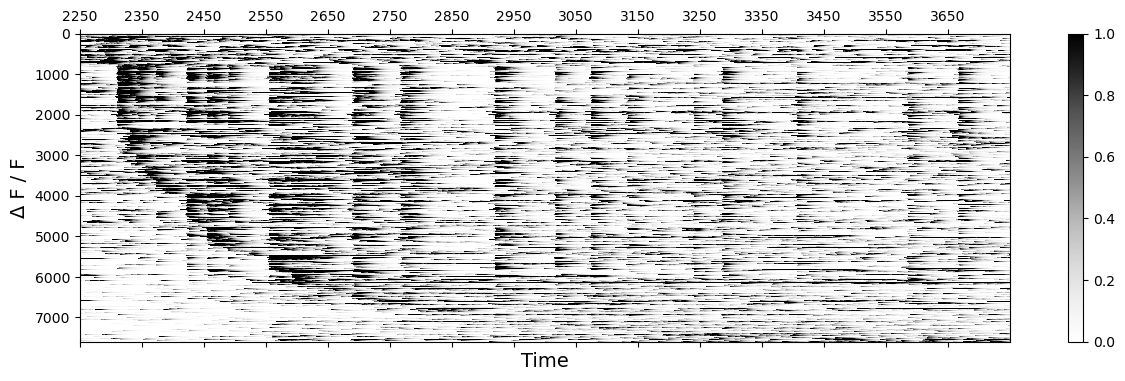

7596 38


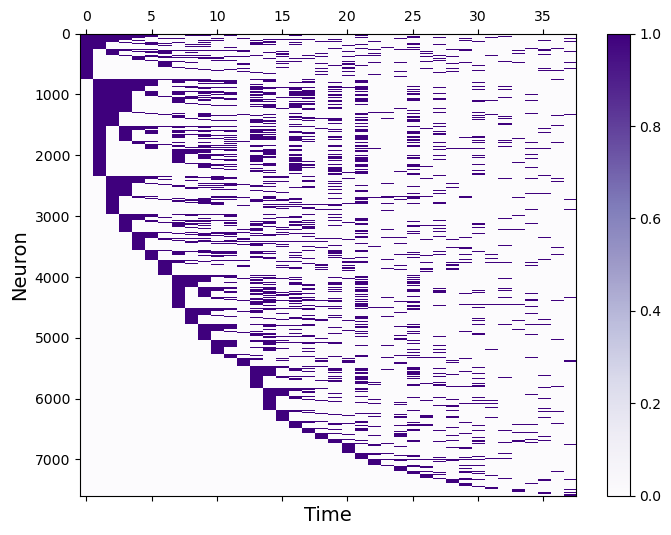

In [31]:
'''
supp neurons
'''
name = "supp"
select_data_ids = np.load(res_path + "neurons/neurons_ids_" + name + "_all_start_set_selfAvg_relax.npy")
print("select_data_ids:", len(select_data_ids), type(select_data_ids))

calc_rec = denoised_data[select_data_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()


'''
sort supp neurons
'''
select_data_ids_dict = {}
for start in bs_ane_time_range:   
    if start in bs_time_range:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_burst_start" + str(start) + "_duration" + str(duration) + "_selfAvg_relax.npy")
    else:
        select_data_ids_dict[start] = np.load(res_path + "neurons/neurons_ids_supp_start" + str(start) + "_duration" + str(duration) + "_selfAvg_relax.npy")
code_list = []
count_0 = 0
for neuron_i in select_data_ids:
    code = []
    for start in bs_ane_time_range:
        if neuron_i in select_data_ids_dict[start]:
            code.append(1)
        else:
            code.append(0)
    code_int = ''.join(str(i) for i in code)
    code_list.append(int(code_int))
    if int(code_int) == 0:
        count_0 += 1
print("code_list:", len(code_list))
sort_id = sorted(range(len(code_list)), key = lambda k: code_list[k], reverse = True)
print("sort_id:", len(sort_id))
sort_id = sort_id[0 : len(sort_id) - count_0]
print("sort_id:", len(sort_id))

select_data_ids_sort = [select_data_ids[i] for i in sort_id]
print("select_data_ids_sort:", len(select_data_ids_sort))

calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
print("calc_rec:", calc_rec.shape)

fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()
    
    
'''
supp code
'''

num = len(bs_ane_time_range)
code_matrix = np.zeros((len(sort_id), num))
for i in range(len(sort_id)):
    code = code_list[sort_id[i]]
    code_int_list = [int(j) for j in list(str(code))]

    for k in range(len(code_int_list)):
        int_idx = len(code_int_list) - k - 1
        matrix_idx = num - k - 1
        code_matrix[i,matrix_idx] = code_int_list[int_idx]
print(len(code_matrix), len(code_matrix[0]))

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix, vmin = 0, vmax = 1, cmap = "Purples", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()



only_bs_ids: 1270
bs_and_ane_ids: 5596
------------------ only-type neurons ----------------------


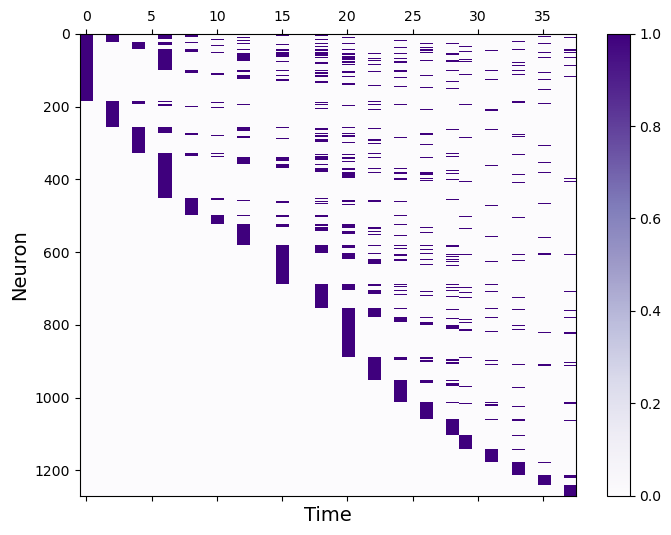

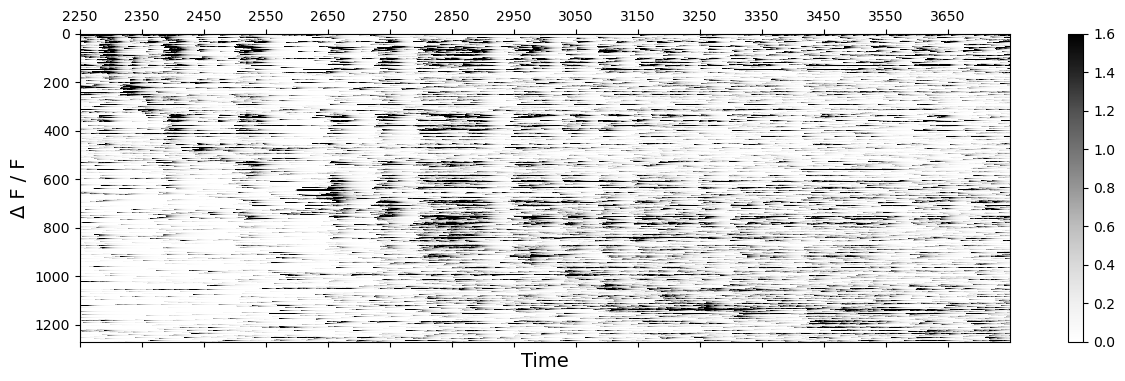

------------------ both-type neurons ----------------------


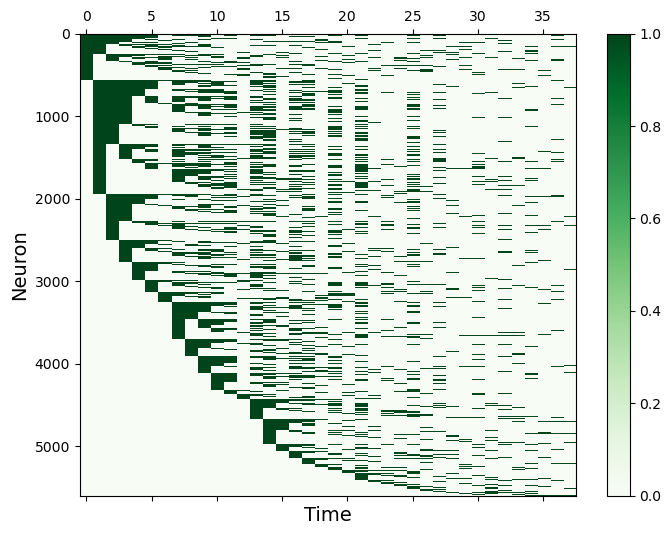

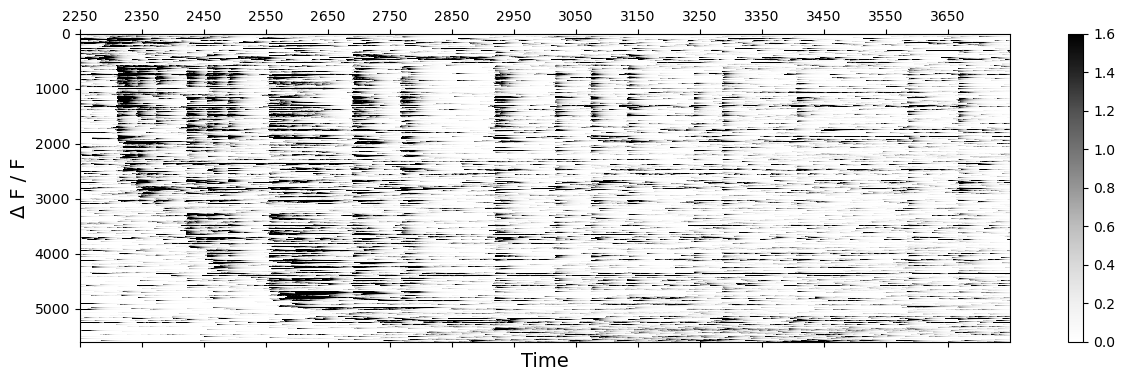

end


In [32]:
'''
detailed category
'''

name = "supp"

only_bs_ids = []
bs_and_ane_ids = []
for i in range(len(code_matrix)):
    active_idx = list(np.where(code_matrix[i] == 1)[0])
    ane_active_idx = list(set(active_idx) & set(ane_time_idx))
    bs_active_idx = list(set(active_idx) & set(bs_time_idx))
    if len(ane_active_idx) == 0:
        continue
    if len(bs_active_idx) == 0:
        only_bs_ids.append(i)
    else:
        bs_and_ane_ids.append(i)
print("only_bs_ids:", len(only_bs_ids)) 
print("bs_and_ane_ids:", len(bs_and_ane_ids))  

## only burst
print("------------------ only-type neurons ----------------------")
code_matrix_only_bs = code_matrix[only_bs_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_only_bs, vmin = 0, vmax = 1, cmap = "Purples", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

data_only_bs_ids = [select_data_ids_sort[i] for i in only_bs_ids]
calc_rec_only_bs = denoised_data[data_only_bs_ids, calc_start : calc_end]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_only_bs, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_only_" + name + ".pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_only_" + name + "_ids.npy", data_only_bs_ids)


## both burst and supp
print("------------------ both-type neurons ----------------------")
code_matrix_bs_ane = code_matrix[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
caxes = ax.matshow(code_matrix_bs_ane, vmin = 0, vmax = 1, cmap = "Greens", aspect = "auto")
fig.colorbar(caxes)
plt.ylabel("Neuron", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/active_code_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

bs_ane_ids = [select_data_ids_sort[i] for i in bs_and_ane_ids]
calc_rec_bs_ane = denoised_data[bs_ane_ids, calc_start : calc_end]
# calc_rec = denoised_data[select_data_ids_sort, calc_start : calc_end]
# calc_rec_bs_ane = calc_rec[bs_and_ane_ids]
fig,ax = plt.subplots(figsize=(15,4), dpi=100, facecolor="w")
caxes = ax.matshow(calc_rec_bs_ane, vmin = 0, vmax = 1.6, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.xticks(np.arange(0, calc_end - calc_start, 100), np.arange(calc_start, calc_end, 100))
plt.ylabel("\u0394 F / F", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/calc_trace_sorted_both_burst_supp.pdf", bbox_inches='tight')
plt.show()

np.save(res_path + "neurons/neurons_both_burst_supp_ids.npy", bs_ane_ids)

print("end")


============= only s neurons =================


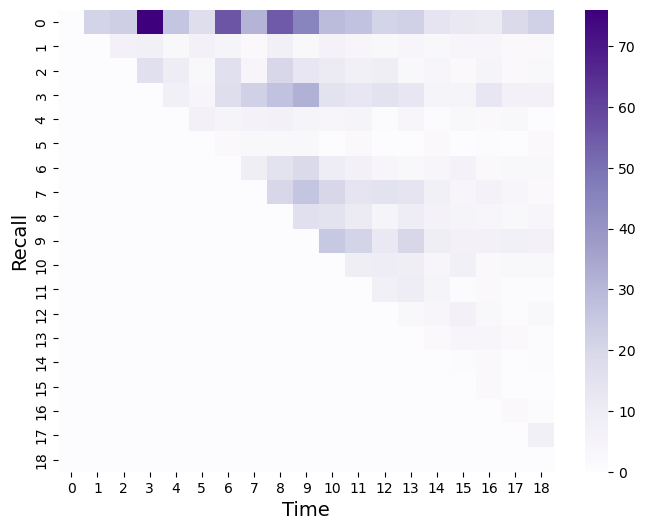

only_b_recruit_num: 19
only_b_recall_num: 19


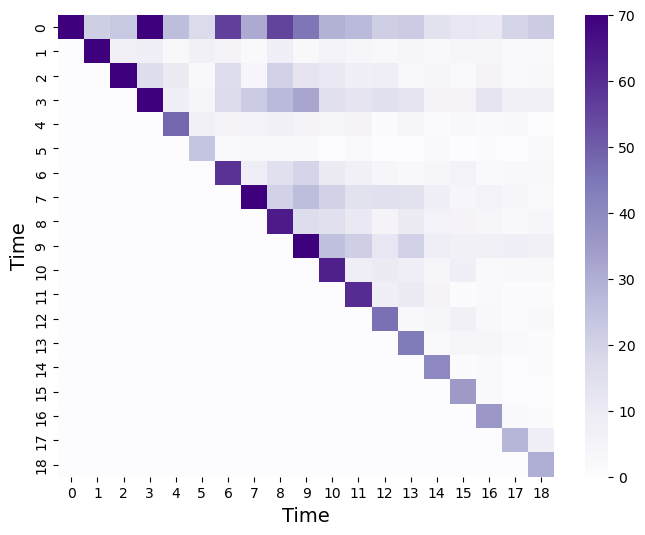

only_b_recruit_ratio: 19
only_b_recall_ratio: 19


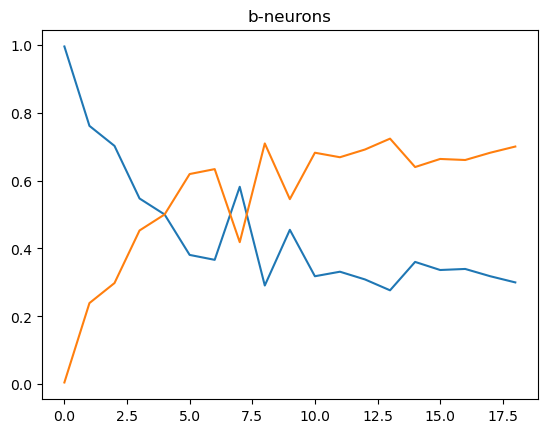

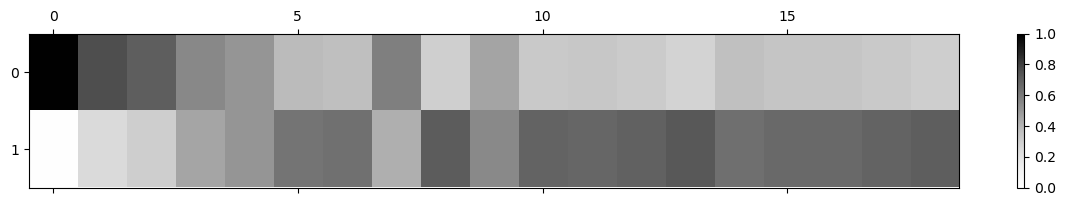

In [33]:
'''
recruit and recall
'''

name = "supp"

print("============= only s neurons =================")

recall_matrix = np.zeros((len(code_matrix_only_bs[0]), len(code_matrix_only_bs[0])))
start_row = 0
for col in range(len(code_matrix_only_bs[0])):
    code_range = code_matrix_only_bs[:, col]
    exist_ids = [i for i in range(len(code_range)) if code_range[i] == 1]
    new_ids = [i for i in exist_ids if i > start_row]
    start_row = max(new_ids) if len(new_ids) != 0 else start_row
    
    new_ids_cnt = len(new_ids)
    new_code_matrix = code_matrix_only_bs[new_ids]
    for new_col in range(col + 1, len(code_matrix_bs_ane[0])):
        recal = sum(new_code_matrix[:, new_col]) if new_ids_cnt != 0 else 0
        recall_matrix[col, new_col] = recal

# recall matrix
recall_matrix_bs = []
for i in ane_time_idx:
    recall_matrix_bs.append(recall_matrix[i])
recall_matrix_bs = np.array(recall_matrix_bs)
recall_matrix_bs_only = []
for i in ane_time_idx:
    recall_matrix_bs_only.append(recall_matrix_bs[:, i])
recall_matrix_bs_only = np.array(recall_matrix_bs_only).T

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_bs_only, cmap = "Purples")
plt.ylabel("Recall", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.show()

# recruit and recall number 
only_b_recruit_num = []
only_b_recall_num = []
start_row = 0
for col in ane_time_idx:
    code_range = code_matrix_only_bs[:, col]
    exist_ids = [i for i in range(len(code_range)) if code_range[i] == 1]
    new_ids = [i for i in exist_ids if i > start_row]
    start_row = max(new_ids) if len(new_ids) != 0 else start_row
    only_b_recruit_num.append(len(new_ids))
    only_b_recall_num.append(len(exist_ids) - len(new_ids))      

np.save(res_path + "neurons/neurons_new_recruit_num_only_ane.npy", only_b_recruit_num)
print("only_b_recruit_num:", len(only_b_recruit_num))
np.save(res_path + "neurons/neurons_recall_num_only_ane.npy", only_b_recall_num)
print("only_b_recall_num:", len(only_b_recall_num))

# recruit and recall matrix
for i in range(len(only_b_recruit_num)):
    recall_matrix_bs_only[i,i] = only_b_recruit_num[i]

fig,ax = plt.subplots(figsize=(8,6), dpi=100, facecolor="w")
sns.heatmap(recall_matrix_bs_only, cmap = "Purples", vmin = 0, vmax = 70)
plt.ylabel("Time", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.savefig(res_path + "neurons/neurons_recruit_vs_recall_matrix_only_ane.pdf", bbox_inches='tight')
plt.show()

# recruit and recall ratio
n_data_only_bs = [only_b_recruit_num[i] + only_b_recall_num[i] for i in range(len(only_b_recruit_num))]
only_b_recruit_ratio = [only_b_recruit_num[i] / n_data_only_bs[i] for i in range(len(only_b_recruit_num))]
print("only_b_recruit_ratio:", len(only_b_recruit_ratio))
only_b_recall_ratio = [only_b_recall_num[i] / n_data_only_bs[i] for i in range(len(only_b_recruit_num))]
print("only_b_recall_ratio:", len(only_b_recall_ratio))

plt.plot(only_b_recruit_ratio)
plt.plot(only_b_recall_ratio)
plt.title("b-neurons")
plt.show()

plot_matrix = np.array([only_b_recruit_ratio, only_b_recall_ratio])
fig,ax = plt.subplots(figsize=(15,2), dpi=100, facecolor="w")
caxes = ax.matshow(plot_matrix, vmin = 0, vmax = 1, cmap = "Greys", aspect = "auto")
fig.colorbar(caxes)
plt.savefig(res_path + "neurons/neurons_recruit_vs_recall_ratio_only_ane.pdf", bbox_inches='tight')
plt.show()
